# Бибилиотеки

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

# Постоянные переменные

In [2]:
N = 1000 #Число клиентов
n = 10  #Максимум окон 
t_del = 8 #Время работы с одним клиентом
t_ind = 0 #Переменная для отслеживания минимального значения ожидания
Beta = [] #Массив % отказов
Delta = [] #Массив загруженности

# Основная программа

In [3]:
for i in range(1,n+1):
    T = 0
    t = [0]*i
    C = 0
    for j in range(N):
        Gamma = random.random()
        Tau = -math.log(Gamma)
        T = T + Tau
        trig = 0
        for k in range(len(t)):
            if t[k] < T:
                t[k] = t[k] + t_del
                trig = 1
                break
        if trig == 0:
            t_min = min(t)
            t_ind = t.index(min(t))
            if t_min < T + 2:
                t[t_ind] = t[t_ind] + 2
            else:
                C += 1
    Beta.append( (C/N) * 100)
    Delta.append( (((N-C) * t_del) / (T * i)) * 100 )

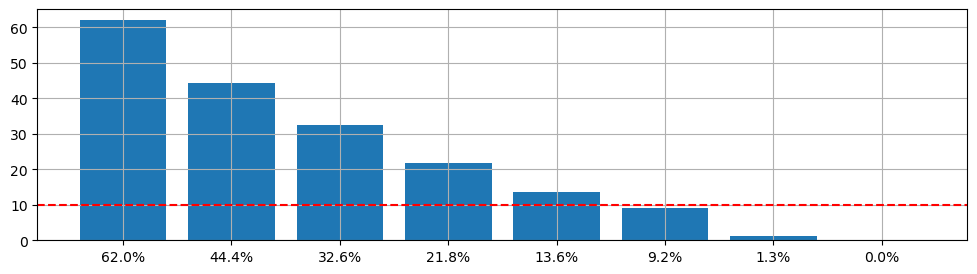

In [4]:
fig = plt.figure(figsize=(12, 3))
X = fig.add_subplot()
x = [f'{round(Beta[i], 1)}%' for i in range(n)]
X.grid()
X.bar(x, Beta)
plt.axhline (y=10, color='red', linestyle='--')

<BarContainer object of 10 artists>

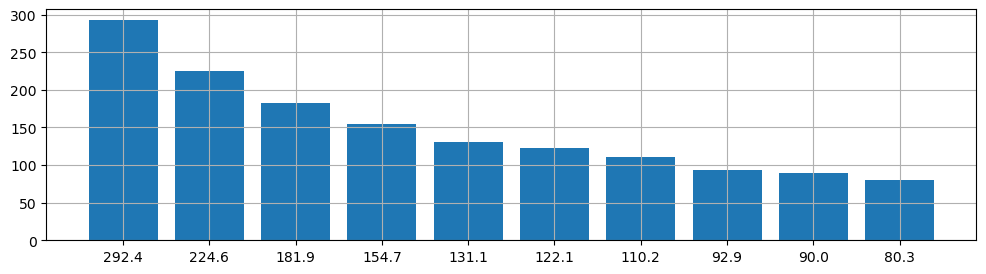

In [5]:
fig = plt.figure(figsize=(12, 3))
X = fig.add_subplot()
x = [f'{round(Delta[i], 1)}' for i in range(n)]
X.grid()
X.bar(x, Delta)